# Säljrapport

*Förslag på rapportstruktur*

## Introduktion

Här skriver vi en kort introduktion. 

In [1]:
import matplotlib.pyplot as plt
from src.io_utils import *
from src.metrics import *
from src.viz import *

# Read
df = read_data("data/ecommerce_sales.csv")

# Clean
df_clean = clean_data(df)

print(df_clean.sample(3))

      order_id       date       city category   price  units  revenue
886     100886 2024-04-19   Göteborg   Sports  418.64      3  1255.92
1955    101955 2024-03-01      Malmö     Home  563.97      2  1127.94
454     100454 2024-02-08  Stockholm     Toys   86.61      4   346.44


## Nyckeltal

Här visualiserar vi våra nyckeltal.

### 1. Vad säljer? – vilka kategorier driver mest intäkt?

**Nyckeltal:** Total intäkt och totalt antal enheter & Intäkt per kategori

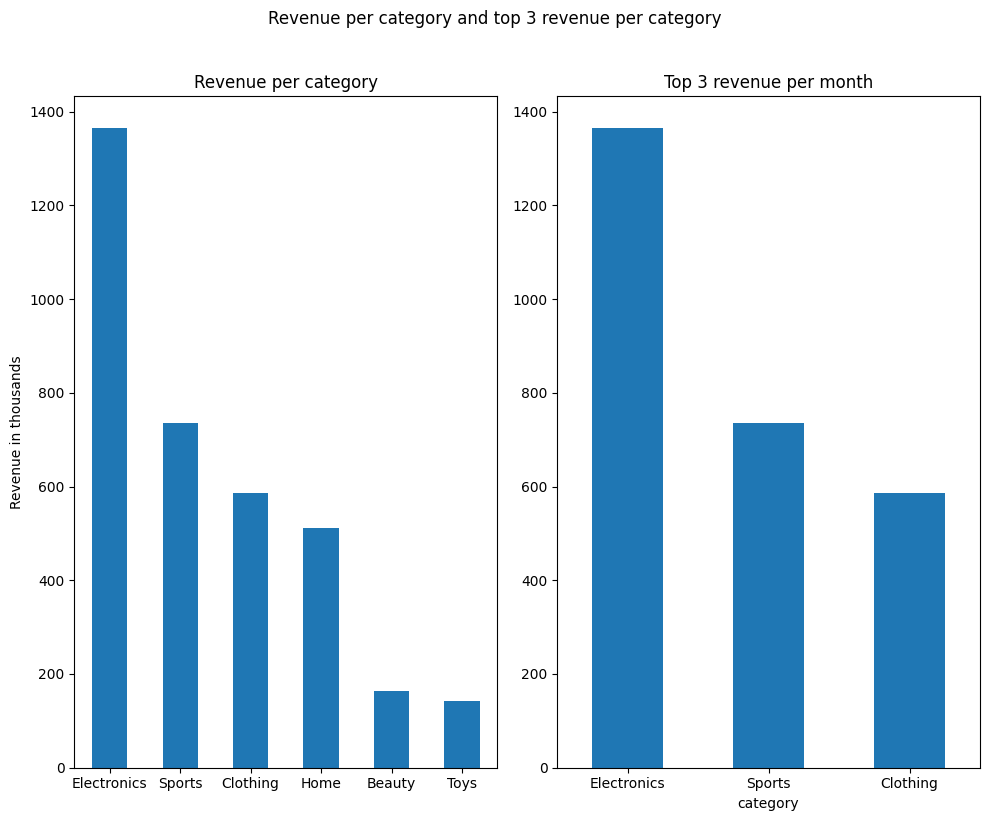

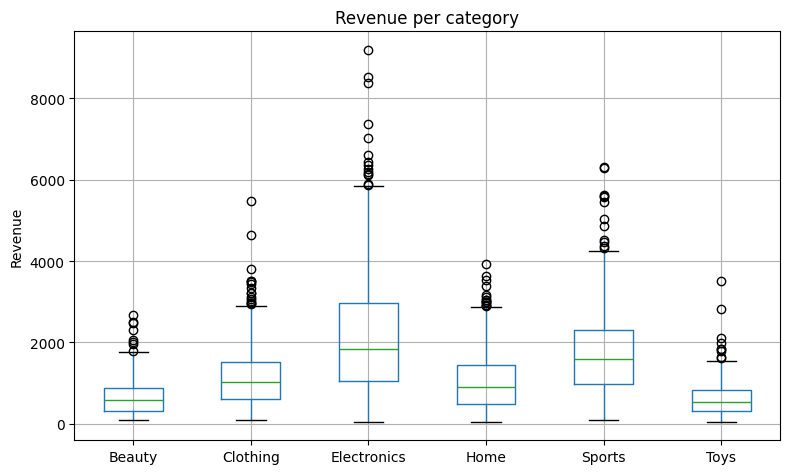

((Clothing       16
Electronics    14
Home           14
Sports         12
Toys            9
Beauty          8
dtype: int64, Electronics    96365.77
Sports         62440.63
Clothing       55747.18
Home           44598.15
Toys           19144.28
Beauty         17764.60
dtype: float64), Electronics    1267862.30
Sports          672212.79
Clothing        530997.73
Home            466472.72
Beauty          145289.37
Toys            123871.71
dtype: float64)


In [2]:
plot_revenue_per_category(df_clean)
boxplot_revenue_per_category(df_clean)

print(looking_for_them_outliers_in_category_revenue(df_clean))

### 2. Var säljer vi? – vilka städer står för störst intäkt?

**Nyckeltal:** Intäkt per stad 

The top 3 cities per revenue are:
        city  tot_rev_city
0  Stockholm    1227201.94
1   Göteborg     859019.65
2      Malmö     567926.32.


<Axes: title={'center': 'Revenue per City'}, xlabel='City', ylabel='Revenue'>

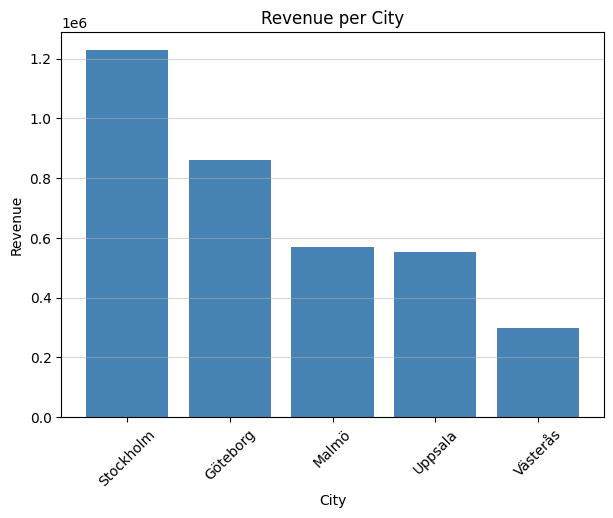

In [3]:
df_rev_city = revenue_per_city(df_clean)
print(f"The top 3 cities per revenue are:\n"
      f"{df_rev_city.head(3)}.")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_rev_city["city"], df_rev_city["tot_rev_city"], "Revenue per City", "City", "Revenue", color="#4682B4")

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

 **Nyckeltal:** TBD

In [4]:
from src.metrics  import  revenue_over_time

#revenue_over_time(df_clean)

ts_month = revenue_over_time(df_clean)
ts_month.head()

KeyError: "None of ['month'] are in the columns"

In [ ]:
from src.metrics import revenue_over_time, total_revenue
from src.viz import revenue_monthly_bar

# revenue_total = V.revenue_total(df_clean)
# revenue_by_month = V.revenue_by_month(df_clean),
# revenue_total, revenue_by_month

fig, ax = plt.subplots(figsize=(9,4))
#revenue_monthly_bar(ax, revenue_over_time["month"], total_revenue["revenue"], "Revenue by month", "Month", "Revenue")

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.

**Nyckeltal:** AOV (Average Order Value)

In [ ]:
# Calculating Order Value data
monthly_aov, total_aov, category_aov, city_aov, ave_units_per_order = calculate_aov(df_clean)

# Plotting the Order Value data
plot_ov_figure(monthly_aov, total_aov, category_aov, city_aov, ave_units_per_order, df)

### 5. Topp-listor – topp-3 kategorier efter intäkt.

**Nyckeltal:** Top-3 kategorier efter intäkt

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?

*Insikter om avvikelser som går att utläsa från sammanställning av datan ovan*

## Rekommendationer

Avsluta rapporten med 2–3 korta rekommendationer (punktlista) baserat på era resultat, t.ex. “Satsa på kategori X i stad Y under månad Z”.